# **Analise de Dados Air B&B - Amsterdã**

>O **AirB&B** é considerada a **maior empresa hoteleira da atualidade, mesmo que não possua nenhum hotel**. Essa empresa funciona como um marketplace que une pessoas que buscam um local para se hospedar em uma viagem com aquelas que podem oferecer uma hospedagem em troca de diárias.

> No fim de 2018 a startup fundada a 10 ano atrás ja hávia **hospedado mais de 300 milhões de pessoas** ao redor do mundo, fazendo frente as redes hoteleiras 
tradicoionais

> Uma das principais iniciativas do **AirB&B** é disponibilizar dados do site, de algumas das principais cidades do mundo. Faz isso atravez do portal [Inside AirB&B](http://insideairbnb.com/get-the-data.html) no qual é possivel baixar uma grande quantidade de dados para soluções em DataScience.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Amsterdã, e ver quais insights podem ser extraídos a partir de dados brutos.**


#Obtenção de Dados




In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

%matplotlib inline

In [0]:
# importat o arquivo listings.csv para o DataFrame (importando dados para à  analise)
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2019-12-07/visualisations/listings.csv")

#Analise de Dados

> Esta estapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

### **Dicionario das variáveis**


*   id - Numero gerado como identificador do Imóvel
*   name -  Nome da propriedade do anunciante
*   host_id - Nome do anfitrião
*   neighbourhood_group -  Coluna sem valor válido
*   neighbourhood - Nome do bairro
*   latitude - Coordenada da latitude da propriedade
*   longitude - Coordenada da longitude da propriedade
*   room_type -  Informa o tipo de quarto que é oferecido
*   price - Preço para alugar o imóvel
*   minimun_nights - Noites minimas para conseguir alugar o imóvel
*   number_of_reviews - Número de reviews que o imóvel possui
*   last_review - Data da última review
*   reviews_per_month - Quantidade de reviews por mês
*   calculate_host_listings_count - Quantidade de imóvel que o dono possui
*   availibility_365 - Número de dias que o imóvel esta disponivel duranto o ano(365 dias)

> Antes de qualquer análise, vamos verificar como esta o nosso dataset, analisando as 5 primeiras entradas




In [6]:
# mostrar as 5 primeiras entradas(para mais entradas colocar o numero desejado dentro dos parenteses)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,277,2019-11-21,2.13,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,80,1,306,2019-12-05,2.57,2,198
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.13,2,71
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38673,4.89208,Private room,155,2,206,2019-11-11,2.14,1,251
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,318,2019-11-23,2.81,3,134


### Q1. Quantos atributos(variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipo de Variáveis?

>Vamos prosseguir e indenticar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna

>Esse dataset que baixamos é uma versão "resumida" do AirB&B. Na mesma página que baixamos o arquivos *listings.csv* há uma versão mais completa com 35847 entradas e 106 variaveis(*listings.csv.gz*)

In [9]:
#indentificar o volume de dados do DataFrame
print('Variaveis/Linhas: {}'.format(df.shape[0]))
print('Entradas/Colunas: {}'.format(df.shape[1]))

#verificar as 5 primeiras entradas do DataSet(verificar tipo de cada variavel)
display(df.dtypes)

Variaveis/Linhas: 20025
Entradas/Colunas: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Q2. Qual a porcentagem de valores ausentes no DataSet?

>A qualidade de um DataSet esta diretamente relacionado com a quantidade de dados ausentes. Por isso é muito importante verificar se esse valores nulos são significativos em relção ao total de entradas


* Podemos observar que a coluna neighbourhood_group possuir 100% de valores faltantes.
* As variáveis reviews_per_Month e Last_review possuem aproximandamente 12% de seus valores, nulos.
* A variável host_name possui quase 0.8% dos seus valores, como nulos.
* A variável name tem 0.1% de seus campos como nulos


In [14]:
# ordenar em ordem descrescente as variáveis por seus valores ausentes
# a função sort_values serve para ordenar de forma crescente ou decrescente
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.120050
last_review                       0.120050
host_name                         0.007890
name                              0.001698
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### Q3. Qual o tipo de distribuição das variáveis?

> Para verificar qual a distribuição, irei plotar um histograma.

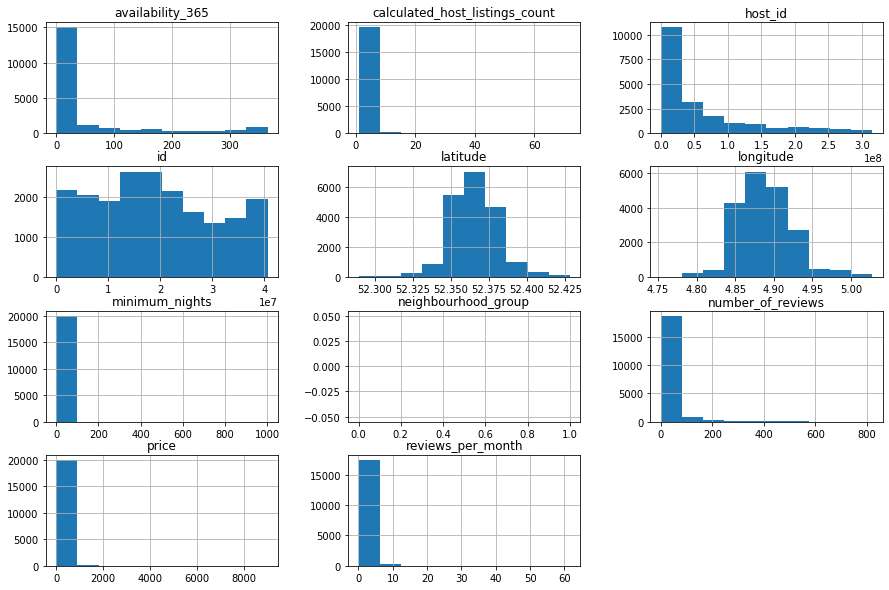

In [23]:
#plotar o histograma das variaveis numéricas
df.hist(bins=10, figsize=(15,10));


### Q4. Há outliers presentes?

> Pela distribuição de alguns histogramas é possivel averiguar que existem alguns outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listnigs_count

>Perceba que os valores não seguem um distribuição e distorcem toda a representação gráfica. Para confirmar isso exitem duas maneiras bem rapidas que auxiliam a detecção de outliers.
São elas:
* Resumo estatistico por meio do metodo describe()
* Plotar Boxplot para à variável

In [25]:
#ver o resumo estátistico das varáveis numéricas selecionadas
df[['price','minimum_nights','calculated_host_listings_count']].describe()

,price,minimum_nights,calculated_host_listings_count
count,20025.000000,20025.000000,20025.000000
mean,163.251685,3.425069,1.972185
std,198.538156,14.740805,5.196736
min,0.000000,1.000000,1.000000
25%,99.000000,2.000000,1.000000
50%,130.000000,2.000000,1.000000
75%,185.000000,3.000000,1.000000
max,9000.000000,1001.000000,72.000000


Olhando o resumo estatístico pudemos confirmar algumas hiposteses como:
* A variável price possui 75% de seu valor abaixo de 185, porém seu valor maximo é de 9000.
* A variável minimum_nights possui um valor maximo de 1001 dias, mais do que o permitido de 365 dias no ano.

minimum_nights: valores acima de 30 dias:
77 entradas
0.3845%


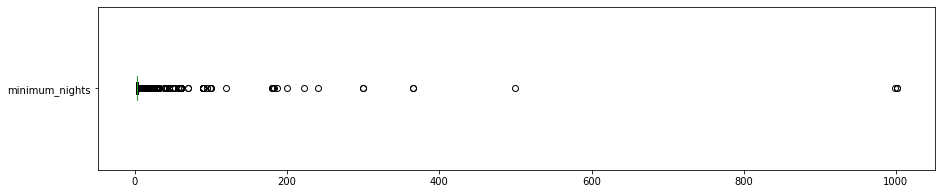

In [28]:
#plotando um gráfico de caixa referente a variável minimum_nights.
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 30 dias para a variável minimum_nights.
print('minimum_nights: valores acima de 30 dias:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30])/df.shape[0])*100))

 

price: valores acima de 1200 euros:
34 entradas
0.1698%


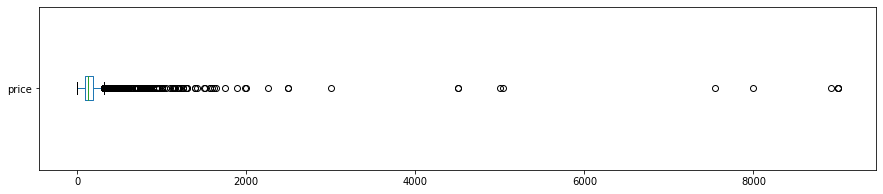

In [34]:
#plotando um gráfico de caixa referente a variável price.
df.price.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 1200 euros para a variável price.
print('price: valores acima de 1200 euros:')
print('{} entradas'.format(len(df[df.price > 1200])))
print('{:.4f}%'.format((len(df[df.price > 1200])/df.shape[0])*100))

####**Histogramas sem outliers**
> Ja que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas, e plotar novamente

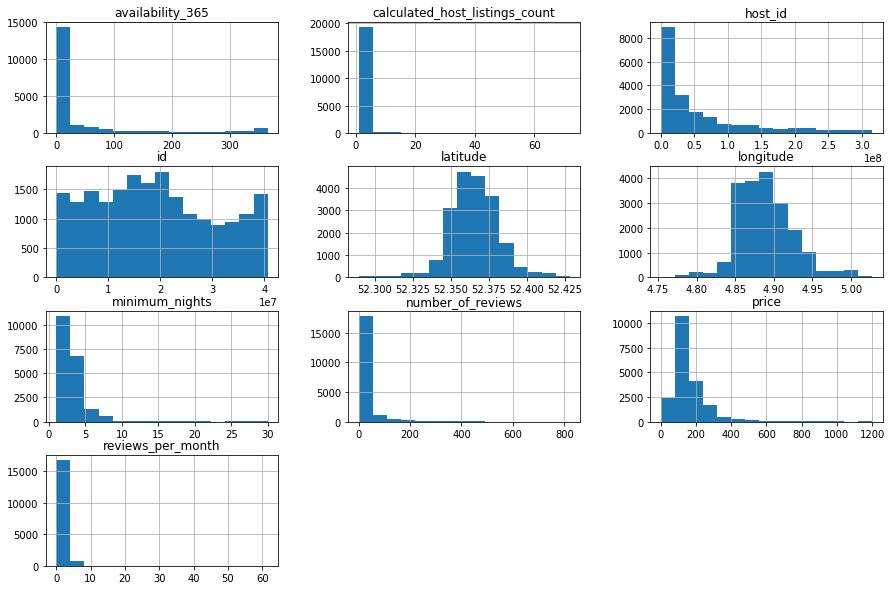

In [35]:
#remover outliers em um novo DataFrame.
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1200].index, axis=0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace = True)

#remover a coluna neighbourhood_group, pois esta vazia.
df_clean.drop('neighbourhood_group', axis=1, inplace = True)

#plotar o histograma novamente, agora de forma limpa.
df_clean.hist(bins=15, figsize=(15,10));

###Q5. Qual a correlação existente entre as variaveis?
>Correlação significa que existe um relação entre duas ou mais coisas. No nosso contexto estamos buscando relação entre duas variáveis.

> Essa relação pode ser medida e é função do coeficiente estabelecer qual a intensidade dela. Podemos fazer isso atravez de:
* Criar uma matriz de correlação.
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.

In [38]:
#criar uma matriz de correlação com matrizes selecionadas
corr = df_clean[['price','minimum_nights','availability_365','number_of_reviews','reviews_per_month']].corr() 
display(corr)

,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month
price,1.000000,0.028823,0.222260,-0.098980,-0.032590
minimum_nights,0.028823,1.000000,0.019399,-0.078674,-0.141157
availability_365,0.222260,0.019399,1.000000,0.194812,0.259550
number_of_reviews,-0.098980,-0.078674,0.194812,1.000000,0.651415
reviews_per_month,-0.032590,-0.141157,0.259550,0.651415,1.000000


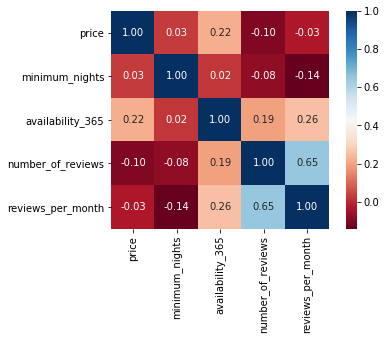

In [40]:
 #utilizando a matriz gerada acima vamos plotar um heatmap.
 sea.heatmap(corr,cmap='RdBu', fmt='.2f', square='true', linecolor='white', annot=True);

###Q6. Qual o tipo de imóvel mais alugado no AirB&B 
> Vamos analisar qual o tipo de imóvel mais alugado olhando para as colunas room_type que indica o tipo de imóvel e usando o método value_counts() que nos diz quantas vezes houve a ocorrência. 

In [41]:
#mostrar a quantidade de cada tipo de imóvel disponível.
df_clean.room_type.value_counts()

Entire home/apt    15487
Private room        4044
Hotel room           326
Shared room           58
Name: room_type, dtype: int64

In [42]:
#mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.777655
Private room       0.203063
Hotel room         0.016370
Shared room        0.002912
Name: room_type, dtype: float64

> Podemos observar acima que as casas/apto completos **representam 77,7% dos imóveis** disponiveis, sendo assim os mais procurados para aluguel ja que estão em maior quantidade e maior probabilidade de serem escolhidos

###Q7. Qual a localidade mais cara de Amsterdã?
>Vamos agora verificar qual os lugares mais caros e mais baratos em relação a sua média de preço.

In [51]:
#8 bairros mais caros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:8] 

neighbourhood
Centrum-West                201.488511
Centrum-Oost                191.451706
Zuid                        179.225161
De Pijp - Rivierenbuurt     164.092532
Buitenveldert - Zuidas      157.766537
IJburg - Zeeburgereiland    156.124736
Oud-Noord                   155.355372
Westerpark                  152.961775
Name: price, dtype: float64

In [52]:
#8 bairros mais baratos
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = True)[:8]

neighbourhood
Bijlmer-Oost                87.252427
Bijlmer-Centrum             91.823009
Gaasperdam - Driemond       94.946565
Osdorp                     108.503497
Slotervaart                121.714943
Bos en Lommer              125.006969
Geuzenveld - Slotermeer    126.093617
Noord-Oost                 126.344828
Name: price, dtype: float64

In [57]:
#quantidade de pessoas alugando casas em Centrum-West.
print('pessoas que alugaram em Centrum-West:')
print(df[df.neighbourhood=='Centrum-West'].shape[0])
print('--------------------------------')
#quantidade de pessoas alugando casas em Bijlmer-Oost.
print(' pessoas que alugaram em Bijlmer-Oost:')
print(df[df.neighbourhood=='Bijlmer-Oost'].shape[0])

pessoas que alugaram em Centrum-West:
2186
--------------------------------
 pessoas que alugaram em Bijlmer-Oost:
106


> Pudemos observar que o bairro Centrum-West lidera a lista dos bairros mais caro com uma média de 201 euros por noite.
 Já na outra dianteira o bairro Biljmer-Oost lidera como o mais barato com média de 87 euros por noite.
 Podemos observar junto a isso que em ambas as localidades temos dados suficientes para comprovar a media de preço no bairro


>Como nos foi fornecido longitude e latitude podemos plotar um gráfico através dessas variáveis sendo longitude o eixo (x) e latitude sendo o eixo (y).

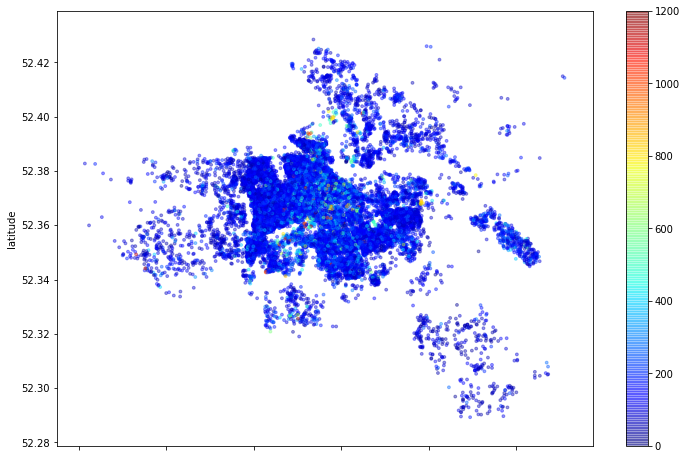

In [60]:
#plotar os imóveis pelas coordenadas.
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

##**Conclusões**

>Foi feita apenas uma analise superficial dos dados do AirB&B na capital holandesa(Amsterdã), pórem pode-se notar que há alguns outliers que dificultam a analise estatística com precisão. Em contra partida foi possível analisar que existe uma concentração de imóveis mais caros conforme se aproxima ao centro da cidade e imóveis mais baratos nos suburbios de Amsterdã. Outro ponto importante que foi a análisado é que grande parte dos viajantes optam pelo centro da cidade ja que é onde se concentra a maioria dos imóveis optando assim pela opção mais cara que gera mais conforto. Por fim lembra-se que o DataSet utilizado é resumido e oferece apenas uma visão superficial da situação, assim recomenda-se um análise com uma base de dados mais abrengente.